In [30]:
if __name__ == '__main__':
    import sys
    import os
    from pathlib import Path
    curr_file_path = Path(os.path.abspath(''))
    sys.path.append(str(curr_file_path.parent))

import numpy as np
import glob2 as glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA
from agents.networks.gru_rnn import GRU_RNN

In [31]:
HIDDEN_SIZE = 4
INPUT_SIZE = 1
DEVICE = 'cuda'
LEARNING_RATE = 1e-3
VAR_NOISE = 1e-4

In [69]:
network_trained = GRU_RNN(
    input_size=INPUT_SIZE,
    hidden_size=HIDDEN_SIZE,
    device=DEVICE,
    var_noise=VAR_NOISE,
)

load_path = '../../results/line_attr_supervised/5_unit_line_2024-12-04_14_05_12_930912_var_noise_0.0001_activity_weight_1e-07/rnn_weights/009999.h5'
network_trained.load_state_dict(torch.load(load_path, weights_only=True))

<All keys matched successfully>

In [70]:
w_ih_trained = network_trained.rnn.weight_ih.detach().cpu().numpy()

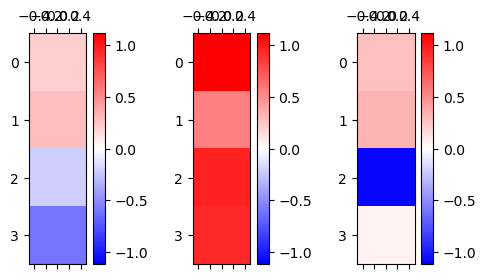

In [72]:
scale = 3
fig, axs = plt.subplots(1, 3, figsize=(2 * scale, 1 * scale))

m = np.abs(w_ih_trained).max()
for k in range(3):
    cbar = axs[k].matshow(w_ih_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

In [73]:
w_hh_trained = network_trained.rnn.weight_hh.detach().cpu().numpy()
b_hh_trained = network_trained.rnn.bias_hh.detach().cpu().numpy()
w_ih_trained = network_trained.rnn.weight_ih.detach().cpu().numpy()
b_ih_trained = network_trained.rnn.bias_ih.detach().cpu().numpy()

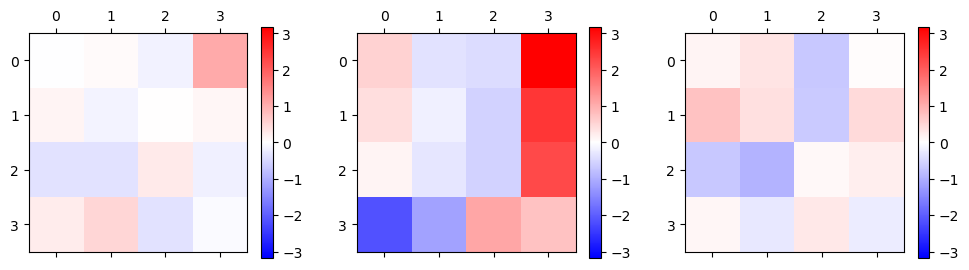

In [74]:
scale = 3
fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))

m = np.abs(w_hh_trained).max()
for k in range(3):
    cbar = axs[k].matshow(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

In [75]:
w_hh_trained_r = w_hh_trained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE, :]
w_hh_trained_z = w_hh_trained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE, :]
w_hh_trained_n = w_hh_trained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE, :]

w_hh_untrained_r = w_hh_untrained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE, :]
w_hh_untrained_z = w_hh_untrained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE, :]
w_hh_untrained_n = w_hh_untrained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE, :]

b_hh_trained_r = b_hh_trained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE]
b_hh_trained_z = b_hh_trained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE]
b_hh_trained_n = b_hh_trained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE]

b_hh_untrained_r = b_hh_untrained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE]
b_hh_untrained_z = b_hh_untrained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE]
b_hh_untrained_n = b_hh_untrained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE]

w_ih_trained_r = w_ih_trained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE, :]
w_ih_trained_z = w_ih_trained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE, :]
w_ih_trained_n = w_ih_trained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE, :]

w_ih_untrained_r = w_ih_untrained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE, :]
w_ih_untrained_z = w_ih_untrained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE, :]
w_ih_untrained_n = w_ih_untrained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE, :]

b_ih_trained_r = b_ih_trained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE]
b_ih_trained_z = b_ih_trained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE]
b_ih_trained_n = b_ih_trained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE]

b_ih_untrained_r = b_ih_untrained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE]
b_ih_untrained_z = b_ih_untrained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE]
b_ih_untrained_n = b_ih_untrained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE]

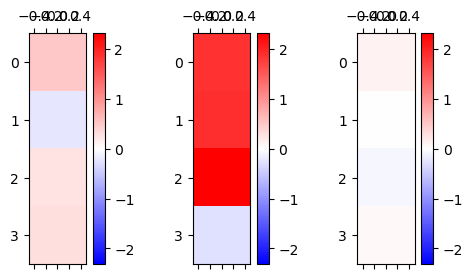

In [78]:
scale = 3
fig, axs = plt.subplots(1, 3, figsize=(2 * scale, 1 * scale))

m = np.abs(b_ih_trained).max()
for k in range(3):
    cbar = axs[k].matshow(b_ih_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE].reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

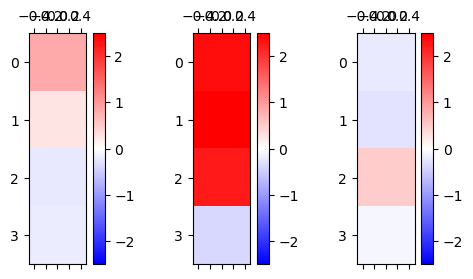

In [79]:
scale = 3
fig, axs = plt.subplots(1, 3, figsize=(2 * scale, 1 * scale))

m = np.abs(b_hh_trained).max()
for k in range(3):
    cbar = axs[k].matshow(b_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE].reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

Text(0.5, 1.0, 'Alignment between input weights and state')

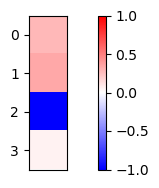

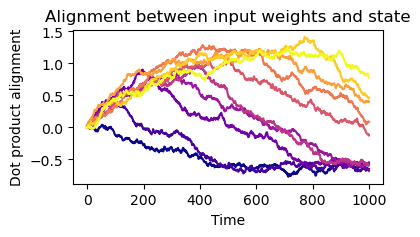

In [138]:
scale = 2
m = 1
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
cbar = axs.matshow(w_ih_trained_n.reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)
axs.set_xticks([])

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 10))

scale = 2
m = 0.5
fig, axs = plt.subplots(1, 1, figsize=(2 * scale, 1 * scale))
for l in range(0, 100, 10):
    cbar = axs.plot(np.arange(1000), np.dot(data[l, :, :].T, w_ih_trained_n), c=colors[int(l/10)])
axs.set_ylabel('Dot product alignment')
axs.set_xlabel('Time')
axs.set_title('Alignment between input weights and state')


(2000, 4, 1000)


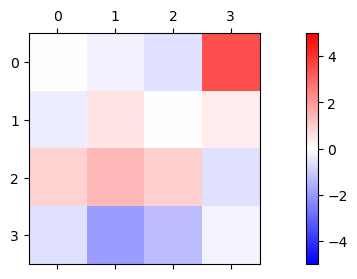

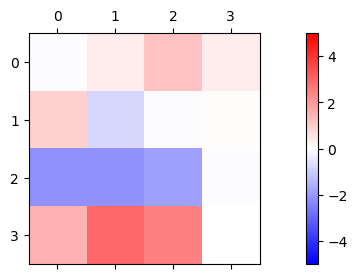

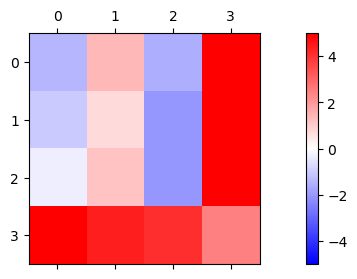

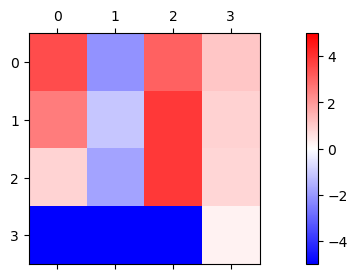

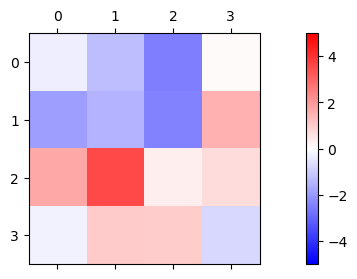

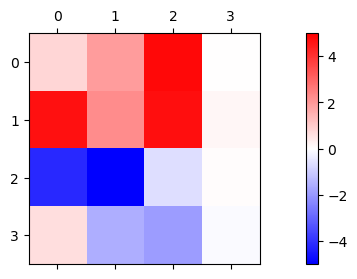

In [102]:
print(data.shape)

scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
m = 5
cbar = axs.matshow(w_hh_trained_r * data[0, :, -10:].sum(axis=1).reshape(1, HIDDEN_SIZE), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
cbar = axs.matshow(w_hh_trained_r * data[99, :, -10:].sum(axis=1).reshape(1, HIDDEN_SIZE), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
m = 5
cbar = axs.matshow(w_hh_trained_z * data[0, :, -10:].sum(axis=1).reshape(1, HIDDEN_SIZE), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
cbar = axs.matshow(w_hh_trained_z * data[99, :, -10:].sum(axis=1).reshape(1, HIDDEN_SIZE), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
m = 5
cbar = axs.matshow(w_hh_trained_n * data[0, :, -10:].sum(axis=1).reshape(1, HIDDEN_SIZE), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
cbar = axs.matshow(w_hh_trained_n * data[99, :, -10:].sum(axis=1).reshape(1, HIDDEN_SIZE), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

[]

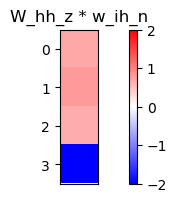

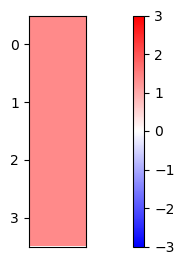

In [140]:
scale = 2
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
m = 2
cbar = axs.matshow(np.dot(w_hh_trained_z, w_ih_trained_n.reshape(HIDDEN_SIZE)).reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)
axs.set_xticks([])
axs.set_title('W_hh_z * w_ih_n')

scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
m = 3
cbar = axs.matshow(np.dot(np.outer(np.ones((HIDDEN_SIZE)), w_ih_trained_n), w_ih_trained_n.reshape(HIDDEN_SIZE)).reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)
axs.set_xticks([])

[ 1.7834264 +0.j         -1.312792  +0.j         -0.8034195 +0.49541268j
 -0.8034195 -0.49541268j -0.3666591 +0.6510901j  -0.3666591 -0.6510901j
 -0.20698339+0.6234149j  -0.20698339-0.6234149j  -0.72313935+0.j
 -0.66239136+0.j          0.31445736+0.2396662j   0.31445736-0.2396662j
  0.25481498+0.28950727j  0.25481498-0.28950727j -0.09864762+0.42735347j
 -0.09864762-0.42735347j -0.32315493+0.36717957j -0.32315493-0.36717957j
 -0.4534866 +0.07838388j -0.4534866 -0.07838388j -0.08804551+0.33118254j
 -0.08804551-0.33118254j  0.22883774+0.j          0.05338923+0.22514033j
  0.05338923-0.22514033j  0.11169687+0.06768916j  0.11169687-0.06768916j
 -0.25302306+0.1945241j  -0.25302306-0.1945241j  -0.18204056+0.j
 -0.07201344+0.13095963j -0.07201344-0.13095963j]


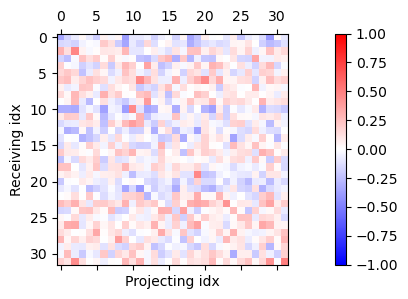

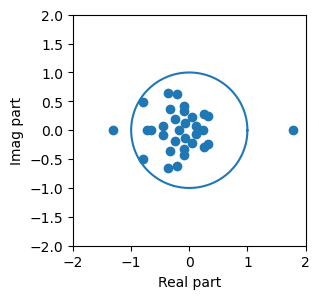

In [175]:
scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))

# w_hh_trained_z_valence = valence * w_hh_trained_z
# m = np.abs(w_hh_trained_z_valence).max()
m = 2
cbar = axs.matshow(w_hh_trained_n * valence.reshape(1, 32), vmin=-1, vmax=1, cmap='bwr')
plt.colorbar(cbar)
axs.set_ylabel('Receiving idx')
axs.set_xlabel('Projecting idx')

vals, vecs = np.linalg.eig(w_hh_trained_n)

scale = 3
fig, axs = plt.subplots(1, 1, figsize=(1 * scale, 1 * scale))

# for x in vals:
#     print(vals)

eigenvals = np.linalg.eig(w_hh_trained_n).eigenvalues
axs.scatter(np.real(eigenvals), np.imag(eigenvals))
l = np.linspace(0, 2 * np.pi, 100)
axs.plot(np.cos(l), np.sin(l))
axs.set_xlim(-2, 2)
axs.set_ylim(-2, 2)
axs.set_ylabel('Imag part')
axs.set_xlabel('Real part')

print(eigenvals)

[ 0.4543168   0.60356957 -0.63348454 -0.16732402]
[0.8618826]


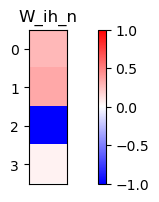

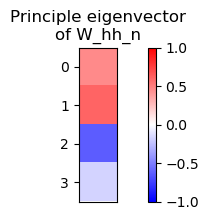

In [134]:
scale = 2
m = 1
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
w_ih_trained_n_ = w_ih_trained_n.reshape(HIDDEN_SIZE, 1)
cbar = axs.matshow(w_ih_trained_n_, vmin=-m, vmax=m, cmap='bwr')
axs.set_xticks([])
axs.set_title('W_ih_n')
plt.colorbar(cbar)

eigenvectors = np.linalg.eig(w_hh_trained_n).eigenvectors
print(np.real(eigenvectors[:, 0]))
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
cbar = axs.matshow(np.real(eigenvectors[:, 0]).reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
axs.set_xticks([])
axs.set_title('Principle eigenvector\nof W_hh_n')
plt.colorbar(cbar)

print(np.dot(np.real(eigenvectors[:, 0]), w_ih_trained_n_ / np.linalg.norm(w_ih_trained_n_)))

In [17]:
def load_hidden_activity(data_path, averaging_size=1):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        print(file_name)
        data_for_file = np.load(file_name)
        print(data_for_file.shape)
        data.append(data_for_file)
    data = np.concatenate(data, axis=0)
    if averaging_size == 1:
        return data
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data

In [92]:
data = load_hidden_activity(
    '../../results/line_attr_supervised/4_unit_prog_fully_trained_2024-12-05_16_33_06_537318_var_noise_0.0001_activity_weight_1e-07/hidden_states/*.npy'
)

../../results/line_attr_supervised/4_unit_prog_fully_trained_2024-12-05_16_33_06_537318_var_noise_0.0001_activity_weight_1e-07/hidden_states\000000.npy
(100, 4, 1000)
../../results/line_attr_supervised/4_unit_prog_fully_trained_2024-12-05_16_33_06_537318_var_noise_0.0001_activity_weight_1e-07/hidden_states\000001.npy
(100, 4, 1000)
../../results/line_attr_supervised/4_unit_prog_fully_trained_2024-12-05_16_33_06_537318_var_noise_0.0001_activity_weight_1e-07/hidden_states\000002.npy
(100, 4, 1000)
../../results/line_attr_supervised/4_unit_prog_fully_trained_2024-12-05_16_33_06_537318_var_noise_0.0001_activity_weight_1e-07/hidden_states\000003.npy
(100, 4, 1000)
../../results/line_attr_supervised/4_unit_prog_fully_trained_2024-12-05_16_33_06_537318_var_noise_0.0001_activity_weight_1e-07/hidden_states\000004.npy
(100, 4, 1000)
../../results/line_attr_supervised/4_unit_prog_fully_trained_2024-12-05_16_33_06_537318_var_noise_0.0001_activity_weight_1e-07/hidden_states\000005.npy
(100, 4, 1000

In [93]:
print(data.shape)

(2000, 4, 1000)


0
20
40
60
80


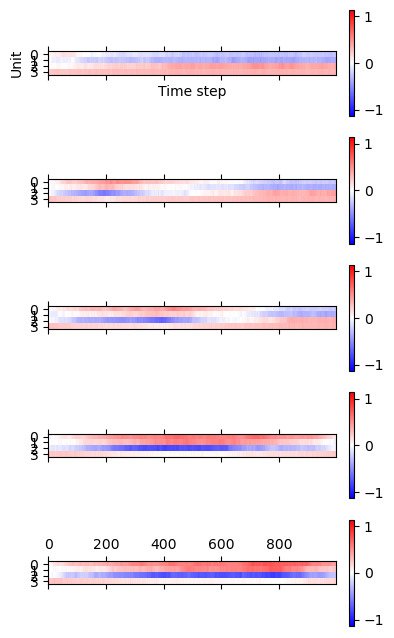

In [129]:
scale = 1
fig, axs = plt.subplots(5, 1, figsize=(4 * scale, 8 * scale), sharex=True, sharey=True)
axs[0].set_ylabel('Unit')
axs[0].set_xlabel('Time step')

m = np.abs(data).max()

for i, k in enumerate(range(0, 100, 20)):
    print(k)
    hidden_activity = data[k, ...]
    cbar = axs[i].matshow(hidden_activity, vmin=-m, vmax=m, cmap='bwr', aspect=20)
    plt.colorbar(cbar, fraction=0.03, pad=0.04)

In [95]:
data_ = np.transpose(data, [1, 0, 2])
flattened_data = data_.reshape(data_.shape[0], data_.shape[1] * data_.shape[2])
print(data_.shape)
print(flattened_data.shape)
pca = PCA()
pc_activities = pca.fit_transform(flattened_data.T)
explained_variance_ratios = pca.explained_variance_ratio_

(4, 2000, 1000)
(4, 2000000)


Text(0.5, 0, 'PC')

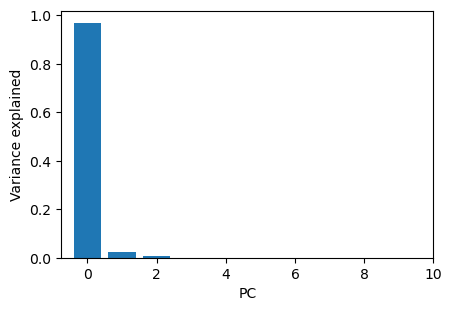

In [96]:
scale = 0.8
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.bar(np.arange(explained_variance_ratios.shape[0]), explained_variance_ratios)
axs.set_xlim(-0.75, 10)
axs.set_ylabel('Variance explained')
axs.set_xlabel('PC')

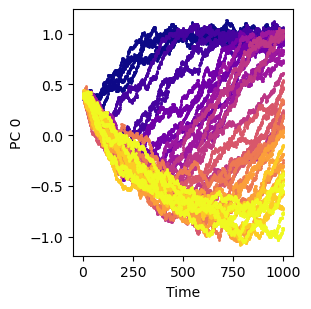

In [114]:
scale = 0.8
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 10))


for run_idx in range(0, 100, 2):
    for k in np.arange(0, 2, 2):
        cbar = axs.scatter(
            np.arange(data.shape[2]),
            pc_activities[data.shape[2] * run_idx:data.shape[2] * (run_idx + 1), k],
            s=1,
            color=colors[int(run_idx/10)],
            # vmax=2,
        )
axs.set_xlabel(f'Time')
axs.set_ylabel(f'PC 0')
    # fig.colorbar(cbar)
fig.tight_layout()

In [98]:
def load_numpy(data_path, averaging_size=1):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        print(file_name)
        data_for_file = np.load(file_name)
        print(data_for_file.shape)
        data.append(data_for_file)
    data = np.concatenate(data, axis=0)
    if averaging_size == 1:
        return data
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data

In [99]:
output_data = load_hidden_activity(
    '../../results/line_attr_supervised/test_5_unit_prog_2024-12-04_15_38_01_639667_var_noise_0.0001_activity_weight_1e-07/outputs/*.npy'
)

../../results/line_attr_supervised/test_5_unit_prog_2024-12-04_15_38_01_639667_var_noise_0.0001_activity_weight_1e-07/outputs\000000.npy
(2, 100)
../../results/line_attr_supervised/test_5_unit_prog_2024-12-04_15_38_01_639667_var_noise_0.0001_activity_weight_1e-07/outputs\000001.npy
(2, 100)
../../results/line_attr_supervised/test_5_unit_prog_2024-12-04_15_38_01_639667_var_noise_0.0001_activity_weight_1e-07/outputs\000002.npy
(2, 100)
../../results/line_attr_supervised/test_5_unit_prog_2024-12-04_15_38_01_639667_var_noise_0.0001_activity_weight_1e-07/outputs\000003.npy
(2, 100)
../../results/line_attr_supervised/test_5_unit_prog_2024-12-04_15_38_01_639667_var_noise_0.0001_activity_weight_1e-07/outputs\000004.npy
(2, 100)
../../results/line_attr_supervised/test_5_unit_prog_2024-12-04_15_38_01_639667_var_noise_0.0001_activity_weight_1e-07/outputs\000005.npy
(2, 100)
../../results/line_attr_supervised/test_5_unit_prog_2024-12-04_15_38_01_639667_var_noise_0.0001_activity_weight_1e-07/output

In [100]:
print(output_data.shape)

(40, 100)


Text(0, 0.5, '$y$')

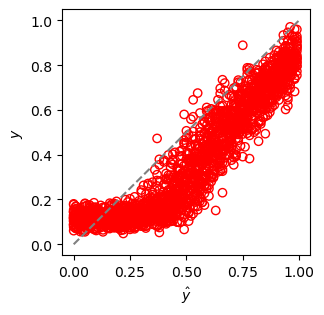

In [141]:
scale = 0.8
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

for k in range(0, output_data.shape[0], 2):
    y = output_data[k, ...]
    y_targ = output_data[k+1, ...]

    cbar = axs.scatter(y_targ, y, edgecolor='red', facecolor='none')
axs.plot([0, 1], [0, 1], '--', c='gray')
axs.set_xlabel(r'$\hat{y}$')
axs.set_ylabel(r'$y$')